In [311]:
import pandas as pd
from mikes_utils import *
df = pd.read_csv('clean_train.csv')
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,5,65.0,8450,1,1,3,0,7,4,...,0,0,1,0,0,0,0,1,0,208500
1,2,0,80.0,9600,1,1,3,0,6,7,...,0,0,1,0,0,0,0,1,0,181500
2,3,5,68.0,11250,1,1,0,0,7,4,...,0,0,1,0,0,0,0,1,0,223500
3,4,6,60.0,9550,1,1,0,0,7,4,...,0,0,1,1,0,0,0,0,0,140000
4,5,5,84.0,14260,1,1,0,0,8,4,...,0,0,1,0,0,0,0,1,0,250000


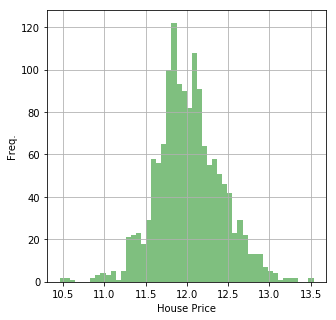

In [312]:
from matplotlib import pyplot as plt
import numpy as np

df['SalePrice'].apply(lambda x: np.log(x)).hist(bins=50, facecolor='green', alpha=0.5)
plt.xlabel('House Price')
plt.ylabel('Freq.')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [313]:
# Let's look a little more into feature engineering
from matplotlib import pyplot as plt
import seaborn as sns

# Plots the relationship between 2 variables and distinguishes between legendary or not
# Helps to see possible obvious clusters of legendaries
def plot_relationship(df, feature1, feature2):
    xplot = [df[feature1].min()], [df[feature1].max()]
    xplot = [df[feature2].min()], [df[feature2].max()]
    plt.scatter(df[feature1], df[feature2], 
                s=50, color='blue',label='Normal')
    plt.grid()
    plt.title('Pairwise Feature Relationship', fontsize=15)
    plt.xlabel(feature1, fontsize=20)
    plt.ylabel(feature2, fontsize=20)
    plt.legend()
    fig=plt.gcf()
    fig.set_size_inches(8, 8)
    plt.show()

In [314]:
print_moderate_correlations(df, 'SalePrice') 

OverallQual :  0.7909816005838047
YearBuilt :  0.5228973328794967
YearRemodAdd :  0.5071009671113867
MasVnrArea :  0.47261449900457725
ExterQual :  -0.6368836943991124
BsmtQual :  -0.5937339191038178
TotalBsmtSF :  0.6135805515591944
HeatingQC :  -0.4001775431629018
1stFlrSF :  0.6058521846919166
GrLivArea :  0.7086244776126511
FullBath :  0.5606637627484452
KitchenQual :  -0.5891887782994283
TotRmsAbvGrd :  0.5337231555820238
Fireplaces :  0.4669288367515242
GarageFinish :  -0.4256842542080429
GarageCars :  0.640409197258349
GarageArea :  0.6234314389183598
TotalFlrSF :  0.7168830793692821
TotalSF :  0.7822600527979842
Neighborhood_NridgHt :  0.40214859817526666
Foundation_PConc :  0.4977337525869438


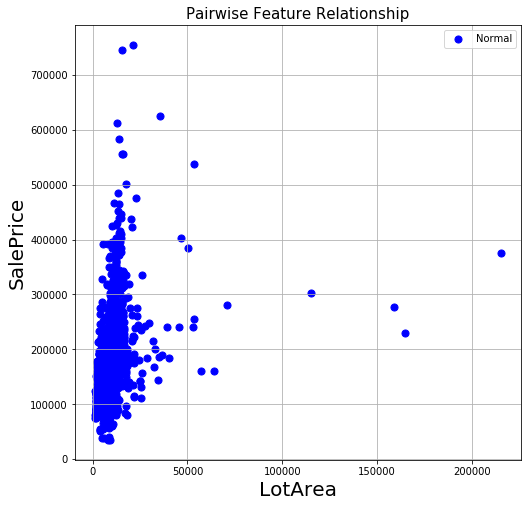

In [315]:
plot_relationship(df, 'LotArea', 'SalePrice')

In [316]:
df = df.drop(df[(df['LotArea'] > 50000)].index)

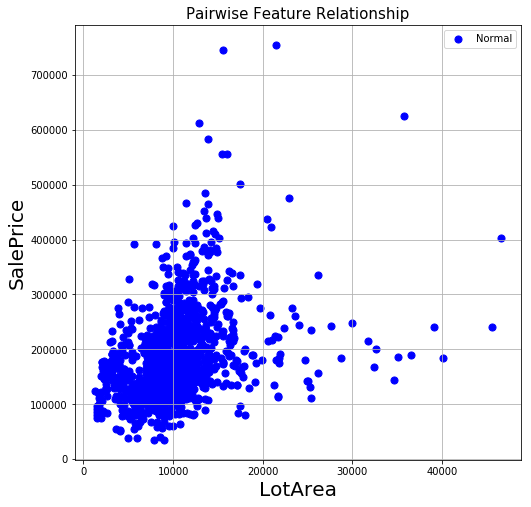

In [317]:
plot_relationship(df, 'LotArea', 'SalePrice')

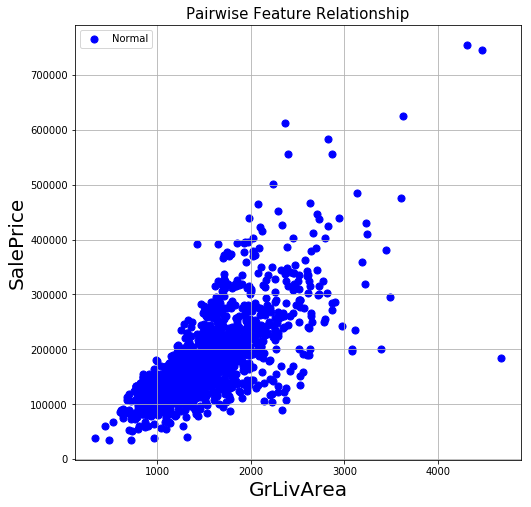

In [318]:
plot_relationship(df, 'GrLivArea', 'SalePrice')

In [319]:
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

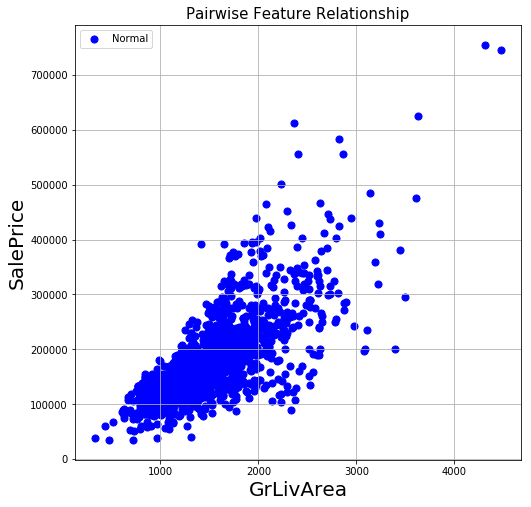

In [320]:
plot_relationship(df, 'GrLivArea', 'SalePrice')

In [321]:
print_moderate_correlations(df, 'SalePrice') 

OverallQual :  0.8008349981641711
YearBuilt :  0.5282037136927485
YearRemodAdd :  0.5132110400776201
MasVnrArea :  0.47852954170039447
ExterQual :  -0.6454091618879888
BsmtQual :  -0.5974932948455737
TotalBsmtSF :  0.6474600453217847
HeatingQC :  -0.4091487949058084
1stFlrSF :  0.6287214419094859
GrLivArea :  0.733123595306026
FullBath :  0.5672218566774726
KitchenQual :  -0.5937073238680826
TotRmsAbvGrd :  0.5389677550989266
Fireplaces :  0.46682760741688395
GarageFinish :  -0.42539889825597915
GarageCars :  0.6414378728435649
GarageArea :  0.6290274614904207
TotalFlrSF :  0.7422587933738657
TotalSF :  0.8307699134189982
Neighborhood_NridgHt :  0.41043400460967927
Foundation_PConc :  0.5092102058047936


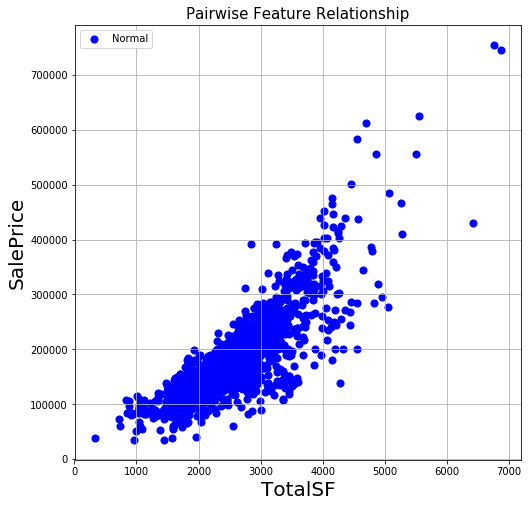

In [322]:
plot_relationship(df, 'TotalSF', 'SalePrice')

In [323]:
df.to_csv('cleaner_train.csv', index=False)